# LA Noire

An [article](http://www.latimes.com/local/lanow/la-me-lapd-crime-stats-20171230-story.html) from the LA Times (2017), have reported that murder and gun violence in the city has reduced, due to the police and the different communities teaming up, by finding strategies and strengthening the trust of the community. However, crime rates still rose by over 5% with an increase of 4% and 8% on property crimes and violent crimes respectively, as stated by this [story](http://www.latimes.com/local/lanow/la-me-crime-trend-study-20171204-story.html). Violent crimes have consistently rise for 4 years in a row, as well as robberies with over 30% citywide increase in cellphone theft.  

This study will be tackling on the crime in Los Angeles, and answer on the possible reasons for the increase of the crime rate in the entire county. It will be broken into 2 main parts, namely: by time series analysis and segmentation analysis.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

plt.style.use("fivethirtyeight")
%matplotlib inline

from IPython.display import clear_output

In [2]:
df = pd.read_csv("data/crime in la.csv")

# What Are The Most Common Crimes In LA?

The data has been taken from [data.gov](https://catalog.data.gov/dataset/crime-data-from-2010-to-present), which is a crime data set ranging from 2010 to the present, 2018. The dataset has already been cleaned by taking out empty cells, and added features such as year, month, and day of the week the crime occurred, and extracted at which place the crime occurred (e.g. street, boulevard, avenue, etc.).  

In [3]:
#function for color scheme
crime_color = {
    'BATTERY - SIMPLE ASSAULT':"rebeccapurple", 'INTIMATE PARTNER - SIMPLE ASSAULT':"blueviolet", 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT':"mediumpurple",
    'BURGLARY FROM VEHICLE':"deeppink", 'BURGLARY':"hotpink",
    'VEHICLE - STOLEN':"mediumturquoise",
    'THEFT PLAIN - PETTY ($950 & UNDER)': "lightcoral", 'THEFT OF IDENTITY':"indianred",
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114':"limegreen", 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)':"lime"
}

def color_wheel(crime_name):
    return tuple(crime_color[name] for name in crime_name)

In [4]:
#initialize data for top crime analysis
top10_crimes = df["Crime Code Description"].value_counts().head(10).index.tolist()
violent_crimes = df[df["Crime Code Description"].isin(top10_crimes)]

Text(0.5,1,'Top 10 Crimes, Count')

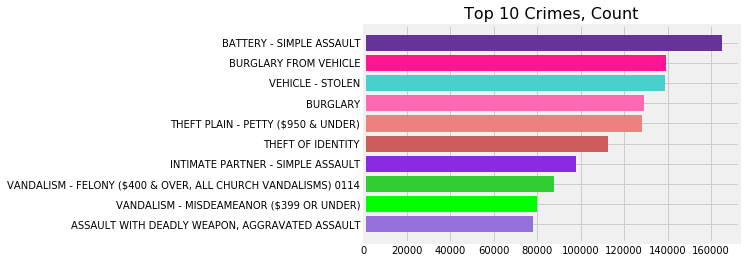

In [5]:
top_count = violent_crimes["Crime Code Description"].value_counts().sort_values()

x_count = [top_count[i] for i in range(len(top_count))]
y = np.arange(len(top_count))

fig, ax = plt.subplots()

ax.barh(y, x_count, color = color_wheel(top_count.index.tolist()))

ax.set_yticks(y)
ax.set_yticklabels(top_count.index.tolist())
ax.set_title("Top 10 Crimes, Count", fontsize = 16)

As the graph shows, this can be grouped into the following:
    
   - Assault - causing physical harm on a person 
   - Burglary - entering a building with the intention to do theft 
   - Theft - taking anything that does not involve any person to person interaction
   - Vandalism -  causing damage to any public property

# Time Series Analysis

In [6]:
#preprocess date features for analysis
df["Date Reported"] = pd.to_datetime(df["Date Reported"])
df["Date Occurred"] = pd.to_datetime(df["Date Occurred"])

df["Date Occurred, day"] = df["Date Occurred"].dt.day

df["Time Occurred"] = df["Time Occurred"].apply(lambda x: round(x, -2))

In [7]:
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location ', 'latitude',
       'longitude', 'Date Occurred, dayofweek', 'Date Occurred, month',
       'Date Occurred, year', 'Address Type', 'Date Occurred, day'],
      dtype='object')

Text(0.5,0.98,'Crime Count, from 2010 to 2018')

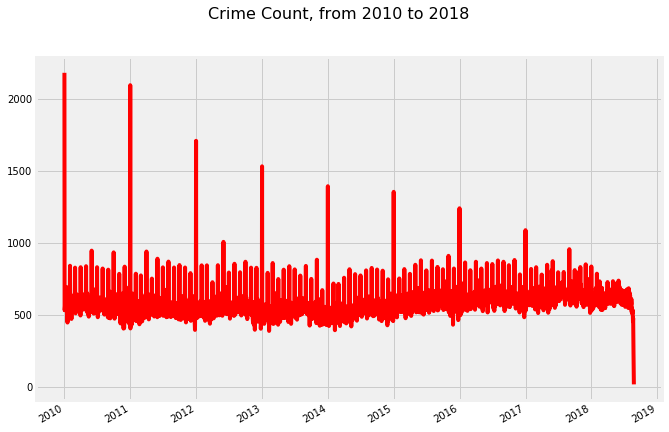

In [8]:
fig = plt.figure(figsize = (10, 7))

df["Date Occurred"].value_counts().plot(color = "red")

fig.suptitle("Crime Count, from 2010 to 2018", fontsize = 16)

There are 2 things worth observing in this graph:
    
   - The increasing crime count from 2014 and onwards, and
   - The large spikes for each start of the year.
   
The increasing crime count could possibly show the effect of Proposition 47, an initiative that reduces non violent and some serious crimes into misdemeanors. This will be explained more when observing the crime count in a yearly level.

For the extremely large spikes, let's take a look at the month of January and observe at which date has the highest amount of crimes and what are the most common.

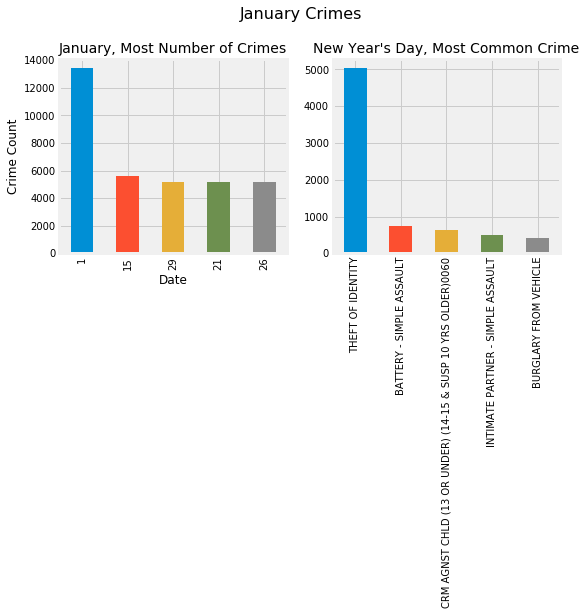

In [9]:
fig, [ax1, ax2] = plt.subplots(ncols = 2, nrows = 1, figsize = (8, 4))

#ax1
df[(df["Date Occurred, month"] == 1)]["Date Occurred"].dt.day.value_counts().head().plot(kind = "bar", ax = ax1)
ax1.set_xlabel("Date")
ax1.set_ylabel("Crime Count")
ax1.set_title("January, Most Number of Crimes", fontsize = 14)

#ax2
df[(df["Date Occurred, month"] == 1) & (df["Date Occurred, day"] == 1)]["Crime Code Description"].value_counts().head(5).plot(kind = "bar", ax = ax2)
ax2.set_title("New Year's Day, Most Common Crime", fontsize = 14)

fig.suptitle("January Crimes", fontsize = 16)
fig.subplots_adjust(top = 0.8)

It is explained well in this graph, that a bulk of the crimes can be found during New Year's Day. This could be because that a lot of people go out and party, and the increase of density population in the area can most likely cause the increase in crime counts as well. It also supplements well on the last graph, that the police have been finding more ways to lessen down the crime, since for each year, the spikes have shown to have decreased. Lastly, the graph on the right shows that most of the crimes are mainly identity theft.

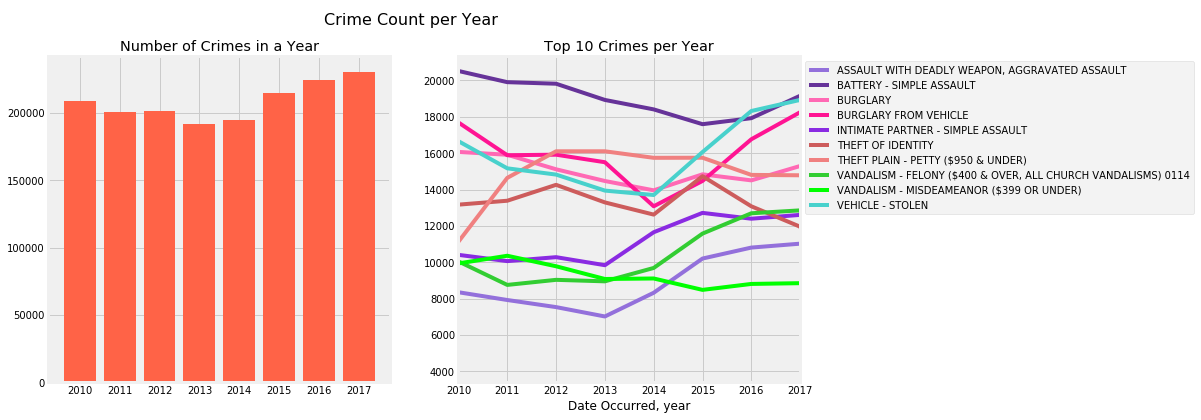

In [10]:
#preapre data

no_2018 = df[df["Date Occurred, year"] != 2018]

#ax1
year_count = no_2018["Date Occurred, year"].value_counts().sort_index()
x_year = year_count.index.tolist()
number_year = np.arange(len(x_year))
crime_count = [year_count[year] for year in x_year]

#ax2
yearly_crimes = pd.crosstab(violent_crimes["Date Occurred, year"], violent_crimes["Crime Code Description"])

#initialize plot
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

ax1.bar(number_year, crime_count, color = "tomato")

ax1.set_xticks(number_year)
ax1.set_xticklabels(x_year)
ax1.set_title("\n\nNumber of Crimes in a Year")

yearly_crimes.plot(color = color_wheel(yearly_crimes.columns.tolist()),ax = ax2)

ax2.legend(bbox_to_anchor = (1, 0.5))
ax2.set_title("Top 10 Crimes per Year")
ax2.set_xlim(2010, 2017)

fig.suptitle("Crime Count per Year", fontsize = 16)

clear_output()

By showing the crime counts and the top 10 crimes per year, it displays that by 2014 all of the crimes have been increasing, most likely because of Proposition 47. This is an [initiative](https://ballotpedia.org/California_Proposition_47,_Reduced_Penalties_for_Some_Crimes_Initiative_(2014) which reduces non violent and serious crimes, into misdemeanors, this was implemented by 2014. Crimes that were deemed as non serious are: shoplifting, grand theft, forgery, fraud, writing a bad check, and illegal use of drugs as long as it does not exceed 950 US dollars which can be linked into the top 10 crimes, wherein vandalism, indetity and petty theft, and burglary are well into the list of proposition 47.

Note: 2018 was not placed on this graph since it is incomplete.

Text(0.5,0.98,'Crime Count per Month')

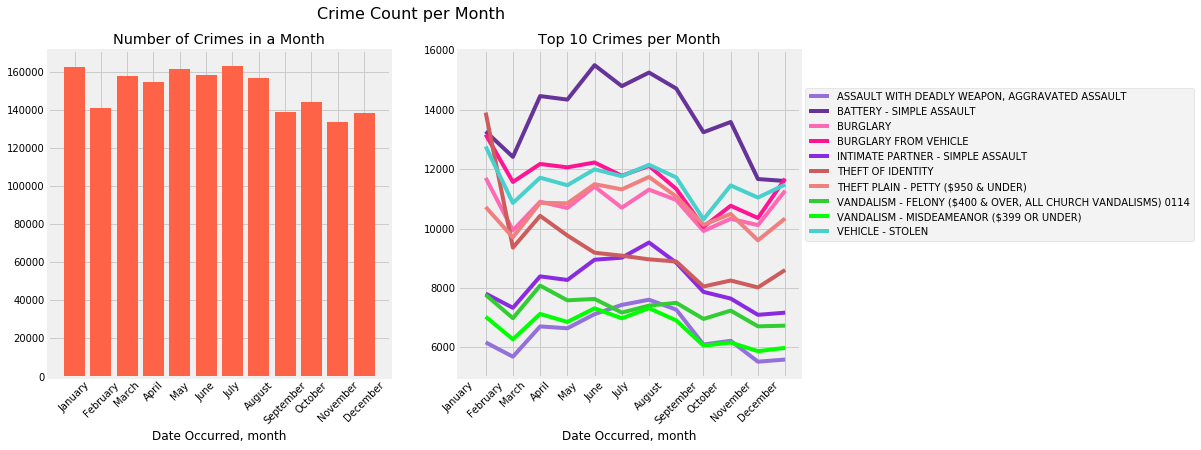

In [11]:
#prepare data
month_count = df["Date Occurred, month"].value_counts().sort_index()
#ax1
x_month = month_count.index.tolist()
number_month = np.arange(len(x_month))
crime_count = [month_count[month] for month in x_month]
#ax2
monthly_crimes = pd.crosstab(violent_crimes["Date Occurred, month"], violent_crimes["Crime Code Description"])
#axis labels
month_label = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November",
              "December"]

#plot
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

ax1.bar(number_month, crime_count, color = "tomato")

ax1.set_xticks(number_month)
ax1.set_xticklabels(month_label, rotation = 45)
ax1.set_xlabel("Date Occurred, month")
ax1.set_title("Number of Crimes in a Month")

monthly_crimes.plot(color = color_wheel(monthly_crimes.columns.tolist()),ax = ax2)

ax2.legend(bbox_to_anchor = (1, 0.9))
ax2.set_title("Top 10 Crimes per Month")
ax2.set_xticks(np.arange(13))
ax2.set_xticklabels(month_label, rotation = 45)

fig.suptitle("Crime Count per Month", fontsize = 16)

A few observations that can be taken from both graphs:

   - Number of Crimes in a Month
       - Comparatively high crime counts on January and from March to August, but decreased during the "ber" months, which is where the temperature starts to cool down.
   - Top 10 Crimes per Month
       - Vandalism cases, green colored lines, are relatively constant all throughout the year.
       - Same with stealing related cases, pink and  blue lines, it shows to have realtively consistent readings except for the decrease during the month of September.
       - Identity theft cases are really high during the month of January.
       - All assault related cases, have shown to peak during the summer period.
       
From the previous graph, it showed that most identity theft crimes came from January 1st, and by looking it on a monthly level, it is consistent that it is at its peak only during January and decreases all throughout the year. One possible explanation is the amount of parties as well as activities all throughout New Year's Day that characterizes the unusually high identity theft count. For the assault related cases, one possible reason for that, comes from a [study](https://www.sciencedirect.com/science/article/pii/S0065260100800040) made by Anderson et al. which showed that during hotter months, aggression related cases are more widespread compared to colder months. 

Text(0.5,0.98,'Crime Count per day of week')

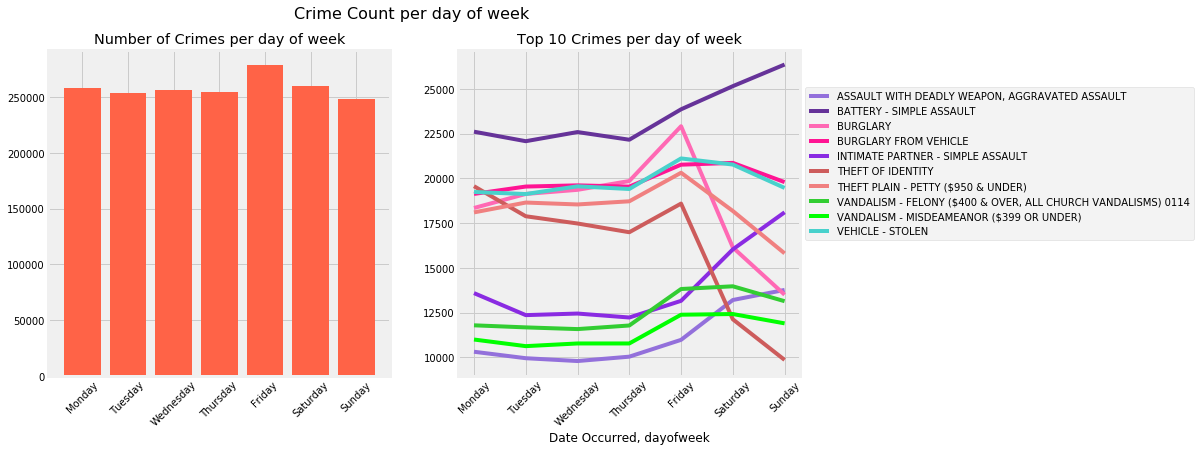

In [12]:
#prepare data
dow_count = df["Date Occurred, dayofweek"].value_counts().sort_index()
#ax1
x_dow = dow_count.index.tolist()
number_dow = np.arange(len(x_dow))
crime_count = [dow_count[dow] for dow in x_dow]
#ax2
dow_crimes = pd.crosstab(violent_crimes["Date Occurred, dayofweek"], violent_crimes["Crime Code Description"])
#axis labels
day_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

ax1.bar(number_dow, crime_count, color = "tomato")

ax1.set_xticks(number_dow)
ax1.set_xticklabels(x_dow)
ax1.set_title("Number of Crimes per day of week")

dow_crimes.plot(color = color_wheel(dow_crimes.columns.tolist()),ax = ax2)

ax2.legend(bbox_to_anchor = (1, 0.9))
ax2.set_title("Top 10 Crimes per day of week")

#change xtick labels
for ax in [ax1, ax2]:
    ax.set_xticks(np.arange(7))
    ax.set_xticklabels(day_week, rotation = 45)

fig.suptitle("Crime Count per day of week", fontsize = 16)

The bar chart shows similar crime counts for each day, but a slight bump on Friday. However, the line graph shows much more: all the crimes, except for battery - simple assault, shows that throughout the weekday they are all relatively constant but by friday there's a slight increase before decreasing during the weekends. The reason for the increase of crime incidents on Friday is because a lot of people go out, especially at night which consequently gives a higher probability of crimes. For battey - simple assault, which shows an increase from Friday down to Sunday, one possible explanation for this would be alcohol. A [study](https://www.verywellmind.com/alcohol-facilitates-aggression-62647) made by Dominic Parrot, which showed that there's a higher likelihood that people who are drunk get into fights and show aggressive behavior compared to people who are sober.

Text(0,0.5,'Crime Count')

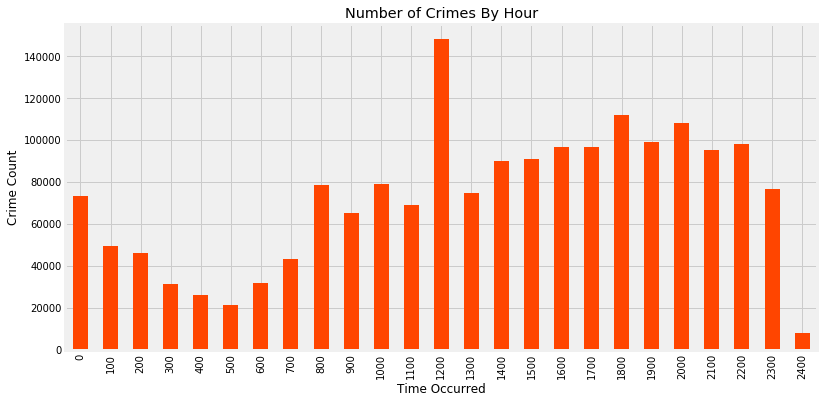

In [13]:
#ax2
hourly_crimes = pd.crosstab(violent_crimes["Time Occurred"], violent_crimes["Crime Code Description"])


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))

df["Time Occurred"].value_counts().sort_index().plot(kind = "bar", ax = ax, color = "orangered")

ax.set_title("Number of Crimes By Hour")
ax.set_xlabel("Time Occurred")
ax.set_ylabel("Crime Count")

Lookin at the graph, crime count lessens during the early hours of the day starting from 2AM to abbout 5AM, then by the start of 6AM till 12 midnight crime is relatively high. Also during noon time, crime count is at its highest peak. Lastly, more offeneses can be found during the night time compared to day since it is less likely a person can get caught doing a crime.

Next, would be to take a look at the crime count by their offenses to find any trends throughout the day.

Text(0,0.5,'Crime Count')

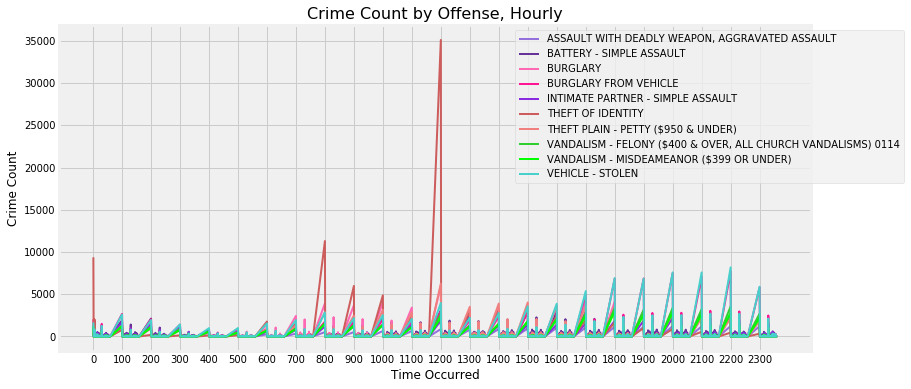

In [14]:
hourly_crimes.plot(color = color_wheel(hourly_crimes.columns.tolist()), linewidth = 2, figsize = (12, 6))

plt.xticks(np.arange(0, 2400, step = 100))
plt.legend(bbox_to_anchor = (0.6, 1))

plt.title("Crime Count by Offense, Hourly", fontsize = 16)
plt.ylabel("Crime Count")

Main points taken from the graph:
   
   - Burglaries are found during opeing hours of stores, between 9AM to noon.
   - Main reason for the high crime count during noon time is because of identity theft.
   - During night time, stealing, vandalism, and assault related cases are prevalent.
   
Now that time trends have been established, the next part would be to find out the crime hotspots in LA and perform the analysis.

# Cluster Analysis

In [15]:
#take out all outliers from the dataset
cluster_analysis = df[df["longitude"] != 0]

#preprocessing of latitude and longitude variables
geo_coordinates = cluster_analysis[["latitude", "longitude"]] 

scaler = MinMaxScaler()
X_processed = scaler.fit_transform(geo_coordinates)

In [16]:
#use 6 clusters from the previous notebook
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X_processed)

#predict
crime_cluster = pd.DataFrame(kmeans.predict(X_processed))
crime_cluster.columns = ["crime cluster"]

#concatenate predicted clusters to dataframe
cluster_analysis = pd.concat([cluster_analysis, crime_cluster], axis = 1)

#save cluster centers and revert into their respective coordinates
cluster_centers = kmeans.cluster_centers_ #scaled geospatial coordinates
cluster_centers = scaler.inverse_transform(cluster_centers) #transformed into their respective coordinates

![crime hotspots](data/google maps/crime_clusters.png)

# Crime hotspots in LA

The 6 cluster centers shown in the map are found in the following areas:

   - Echo Park
       - Found in the easter part of Central LA and is near the Eastside region. At this part of LA, it is surrounded by well known dangerous areas such as: Chinatown, Elysian Park, Downtown, Boyle Heights, and many other more.
   - Sun Valley
       - Positioned in the northern end of LA at San Fernando Valley. This place is nearby Panorama City, Van Nuys, and Lake Balboa, one of the most dangerous neighborhoods found in San Fernando Valley.
   - Palms
       - Situated at the east end of West LA which is near proximity between Central and South LA. Some areas that are knwon to be dangerous are: Crenshaw, Midcity, and West Adams.
   - Vermont Slauson
       - This cluster is found in South LA which is situated in the most dangerous neighborhoods in the entire county. Some of the most dangerous areas here are: Chesterfield Square, Harvard Square, and Manchester Square which is ranked as first, second, and third most dangerous places in the entire LA county.
   - Wilmington
       - This cluster captures the areas in the south side of LA, the Harbor. At this part of town, most of the people living here are latinos, about 87%. The rate of college graduated students at this area has also been very low of only 5%. 
   - Winnetka
        - A place in San Fernando Valley, which has the most diverse ethnicities found in the area with over 40% Latinos, 36% White, and 4% Black. This cluster center is right beside Canoga park, ranked 44th most dangerous neghborhood in the entire LA county.

   
These crime hotspots are based on an [article](http://maps.latimes.com/neighborhoods/violent-crime/neighborhood/list/) made by the LA times which mapped out the risk of a crime happening for each neighborhood.

In [17]:
cluster_analysis.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location ', 'latitude',
       'longitude', 'Date Occurred, dayofweek', 'Date Occurred, month',
       'Date Occurred, year', 'Address Type', 'Date Occurred, day',
       'crime cluster'],
      dtype='object')

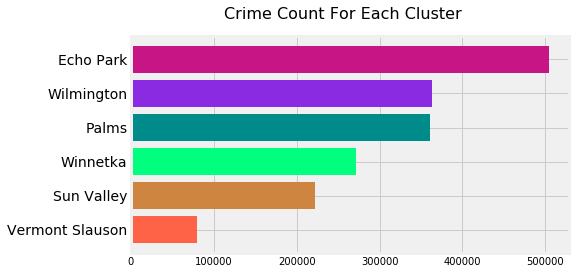

In [23]:
cluster_count = cluster_analysis["crime cluster"].value_counts().sort_values()

x = np.arange(len(cluster_count))
y_count = [cluster_count.iloc[i] for i in range(len(cluster_count))]

cluster_name = ["Vermont Slauson", "Sun Valley", "Winnetka", "Palms", "Wilmington", "Echo Park"]

fig, ax = plt.subplots(figsize = (7, 4))

ax.barh(x, y_count, color = ["tomato", "peru", "springgreen", "darkcyan", "blueviolet", "mediumvioletred"])

ax.set_yticks(x)
ax.set_yticklabels(cluster_name, fontsize = 14)
fig.suptitle("Crime Count For Each Cluster", fontsize = 16)

clear_output()

Interestingly enough, that Vermont Slauson, which is surrounded by one of the most dangerous neighborhoods in the entire LA county has the lowest crime count. One possible reason for this would be that a lot of the crimes happening in this cluster went unreported to the police. Then for the highest crime count cluster, is Echo Park, and an explanation for this is because it is near Central LA, which has one of the highest population densities in the county. Moreover, the 2 clusters located at San Fernando Valley region of LA, showed to be in the lower end of the spectrum.  

In [19]:
#break down by their cluster for analysis
Cluster = {
    "Palms" : cluster_analysis[cluster_analysis["crime cluster"] == 0], #cluster 1
    "Sun Valley" : cluster_analysis[cluster_analysis["crime cluster"] == 1], #cluster 2
    "Echo Park" : cluster_analysis[cluster_analysis["crime cluster"] == 2], #cluster 3
    "Wilmington" : cluster_analysis[cluster_analysis["crime cluster"] == 3], #cluster 4
    "Winnetka" : cluster_analysis[cluster_analysis["crime cluster"] == 4], #cluster 5
    "Vermont Slauson" : cluster_analysis[cluster_analysis["crime cluster"] == 5], #cluster 6
}

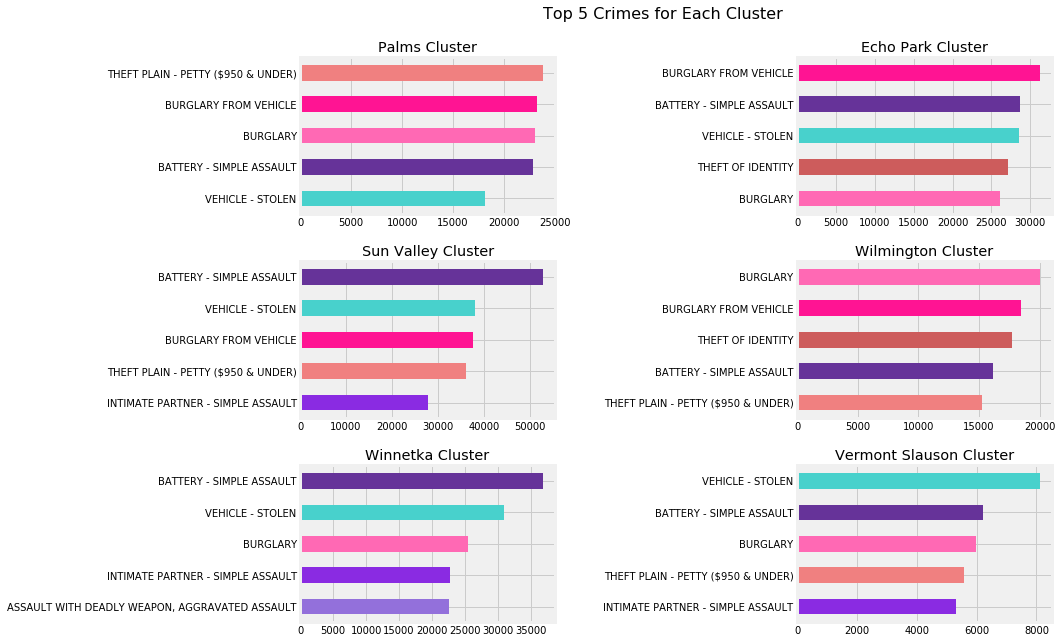

In [20]:
#data
palms_crimes = Cluster["Palms"]["Crime Code Description"].value_counts().head().sort_values()
sunvalley_crimes = Cluster["Sun Valley"]["Crime Code Description"].value_counts().head().sort_values()
echo_crimes = Cluster["Echo Park"]["Crime Code Description"].value_counts().head().sort_values()
wilmington_crimes = Cluster["Wilmington"]["Crime Code Description"].value_counts().head().sort_values()
winnetka_crimes = Cluster["Winnetka"]["Crime Code Description"].value_counts().head().sort_values()
vermont_crimes = Cluster["Vermont Slauson"]["Crime Code Description"].value_counts().head().sort_values()

#graph
fig, [(ax1, ax2), (ax3, ax4), (ax5, ax6)] = plt.subplots(ncols = 2, nrows = 3, figsize = (12, 10))

palms_crimes.plot(kind = "barh", color = color_wheel(palms_crimes.index.tolist()), ax = ax1)
echo_crimes.plot(kind = "barh", color = color_wheel(echo_crimes.index.tolist()), ax = ax2)
sunvalley_crimes.plot(kind = "barh", color = color_wheel(sunvalley_crimes.index.tolist()), ax = ax3)
wilmington_crimes.plot(kind = "barh", color = color_wheel(wilmington_crimes.index.tolist()), ax = ax4)
winnetka_crimes.plot(kind = "barh", color = color_wheel(winnetka_crimes.index.tolist()), ax = ax5)
vermont_crimes.plot(kind = "barh", color = color_wheel(vermont_crimes.index.tolist()), ax = ax6)

ax1.set_title("Palms Cluster")
ax2.set_title("Echo Park Cluster")
ax3.set_title("Sun Valley Cluster")
ax4.set_title("Wilmington Cluster")
ax5.set_title("Winnetka Cluster")
ax6.set_title("Vermont Slauson Cluster")


fig.suptitle("Top 5 Crimes for Each Cluster", fontsize = 16)
plt.subplots_adjust(wspace = 0.95, hspace = 0.3, top = 0.91)

By using the K Means Algorithm to find the crime hotspots in LA, we can observe that:

   - At San Fernando Valley, both Winnetka and Sun Valley showed to have battery as the most common crime.
   - Identity theft cases, which peak during the New Year's Day, showed to be 1 of 2 places: Palms Cluster and Echo Park Cluster.
   - Stolen vehicles are usually reported at South LA, Vermont Slauson cluster. 
   - At the Harbor Region, the Wilmington cluster is having a lot of problems with theft.

# Keeping LA Safe

Looking back, LA crime counts have been increasing since the release of Proposition 47, which was in 2014, and because of that all the other offenses have been getting more and more frequent each day. Also, every New Year's Day, identity theft crimes are its peak and can be found on 2 clusters, which are in the Echo Park and Wilmington area in LA. When looking at the crime at an hourly basis, offenses related to battery, stealing, and vandalism are usually found at night, and by looking at the crime clusters, Vermont Slauson as well as Winnetka and Sun Valley Cluster are the main targets. Lastly, a lot of the burglaries and the theft related cases are found during opeing of store hours and noon time, and with that the most affected clusters are the Palm and Wilmington Cluster.

With that said, the government of LA should employ several strategies in order to address the issues found on all 6 clusters.